In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle

In [7]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

In [38]:
def apply_transform(image, A):
    import numpy as np

    image_ = np.zeros_like(image)

    Xd = criar_indices(0, image.shape[0], 0, image.shape[1])
    Xd = np.vstack((Xd,np.ones((1,Xd.shape[1]))))
    
    X = np.linalg.inv(A) @ Xd

    X = X.astype(int)
    Xd = Xd.astype(int)

    filtro = (X[0,:]>=0)&(X[0,:]<image_.shape[0])&(X[1,:]>=0)&(X[1,:]<image_.shape[1])
    Xd = Xd[:,filtro]
    X = X[:,filtro]

    image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]
    
    return image_


def resize_image_matrix(image, width, height):
    
    tw_image = width / image.shape[1]
    th_image = height / image.shape[0]

    return np.array([
        [th_image, 0, 0], 
        [0, tw_image, 0], 
        [0, 0, 1]
    ])
    
def resize_image(image, width, height):
    A = resize_image_matrix(image, width, height)
    return apply_transform(image, A)
    
def translate_image_matrix(x, y):
    return np.array([
        [1, 0, y], 
        [0, 1, x], 
        [0, 0, 1]
    ])
    
def rotate_image_matrix(deg):
    
    return np.array([
        [np.cos(np.radians(deg)), -np.sin(np.radians(deg)), 0], 
        [np.sin(np.radians(deg)), np.cos(np.radians(deg)), 0], 
        [0, 0,1]
    ])

height 2000
width 1693
[[ 1.00000000e+00  3.93778303e-01  0.00000000e+00]
 [ 0.00000000e+00  1.46977752e+00  0.00000000e+00]
 [-0.00000000e+00  3.93778303e-04  1.00000000e+00]]


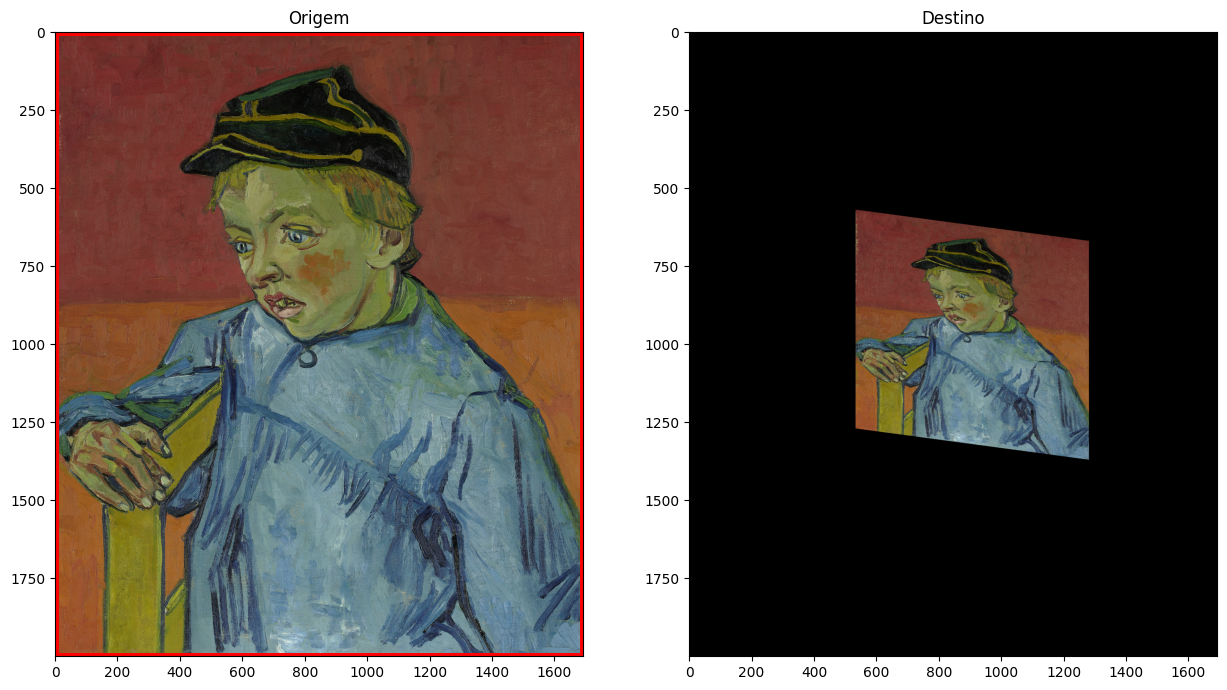

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2

# Read the image
image = mpimg.imread("C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg")

fundo = mpimg.imread("C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/6R0A8419.jpg")

height = image.shape[0]
width = image.shape[1]


print("height", height)
print("width", width)

ini = np.array([
    [width, height/2, 1], 
    [0, 0, 1],
    [0, height, 1]
]).T

final = np.array([
    [width, height/2, 1], 
    [0, height/4, 1], 
    [0, height * 3/4, 1]
]).T


T = final @ np.linalg.inv(ini)

# C = np.array([
#     [1, 0, -height/2], 
#     [0, 1, -width/2], 
#     [0, 0, 1]
# ])

# Tf = np.linalg.inv(C)

# pts1 = np.float32([[0, 0], [height, 0],
#                     [0, width], [height, width]])

# pts2 = np.float32([[0, 0], [height, 0],
#                 [400, width-200], [height-400, width-200]])

# pts1 = np.float32([[0, 0], [640, 0],
#                     [0, 400], [640, 400]])

# pts2 = np.float32([[0, 0], [640, 0],
#                     [0, 400], [640, 400]])

# matrix = cv2.getPerspectiveTransform(pts1, pts2)

ty = height / 4
tx = width / 4
tw = 0.35
th = 0.35

A = np.array([
    [th, 0, ty], 
    [0, tw, tx], 
    [0, 0, 1]
])

# A = matrix @ A

# print(matrix)

image_ = apply_transform(image, A)

# fundo= resize_image(fundo, width, height)

# for i in range(image_.shape[0]):
#     for j in range(image_.shape[1]):
#         if np.sum(image_[i][j]) == 0:
#             image_[i][j] = fundo[i][j]

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.gca().add_patch(patches.Rectangle((0, 0), width, height, linewidth=5, edgecolor='r', facecolor='none'))
plt.title('Origem')

plt.subplot(1, 2, 2)
plt.imshow(image_)
# plt.gca().add_patch(patches.Rectangle((tx, ty), width * tw, height * th, linewidth=5, edgecolor='r', facecolor='none'))
plt.title('Destino')

plt.show()


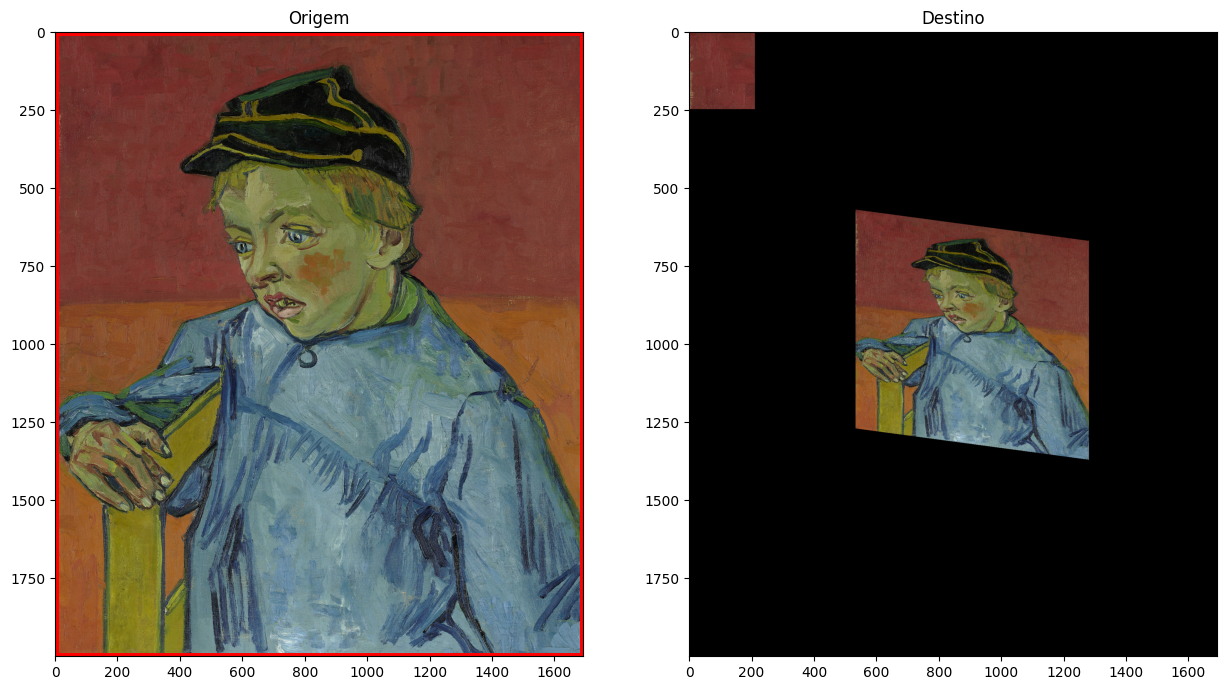

In [47]:
# d = distância
d = 200

# Read the image
image = mpimg.imread("C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg")

Xd = criar_indices(-int(image.shape[0]/8), int(image.shape[0]/8), -int(image.shape[1]/8), int(image.shape[1]/8))
Xd = np.vstack((Xd,np.ones((1,Xd.shape[1])) * -100))
cubo = np.vstack((Xd,np.ones((1,Xd.shape[1]))))

# matriz "pinhole"
M = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,-d],[0,0,-(1/d),0]])

# matriz de translação apenas em Z
Tz = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,350],[0,0,0,1]])

# matriz de translação para o centro da tela
T = np.array([[1,0,0,int(image.shape[0]/4)],[0,1,0,int(image.shape[1]/4)],[0,0,1,0],[0,0,0,1]])

# grau da rotação
a = np.deg2rad(1)

# rotação em X
rx = np.array([[1,0,0,0],[0,np.cos(a),-np.sin(a),0],[0,np.sin(a),np.cos(a),0],[0,0,0,1]])

# rotação em Y
ry = np.array([[np.cos(a),0,-np.sin(a),0],[0,1,0,0],[np.sin(a),0,np.cos(a),0],[0,0,0,1]])

# rotação em Z
rz = np.array([[np.cos(a),-np.sin(a),0,0],[np.sin(a),np.cos(a),0,0],[0,0,1,0],[0,0,0,1]])

# cria a matriz pinhole baseada na nova distância
M = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,-d],[0,0,-(1/d),0]])

# E = matriz que aplica todos os efeitos de uma única vez
E = T @ M @ Tz @ ry

# matriz da projeção do cubo
proj = E @ cubo

X = (proj/proj[3])[:2]

X = np.vstack((Xd,np.ones((1,Xd.shape[1]))))

X = X.astype(int)
Xd = Xd.astype(int)

filtro = (X[0,:]>=0)&(X[0,:]<image_.shape[0])&(X[1,:]>=0)&(X[1,:]<image_.shape[1])
Xd = Xd[:,filtro]
X = X[:,filtro]

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.gca().add_patch(patches.Rectangle((0, 0), width, height, linewidth=5, edgecolor='r', facecolor='none'))
plt.title('Origem')

plt.subplot(1, 2, 2)
plt.imshow(image_)
# plt.gca().add_patch(patches.Rectangle((tx, ty), width * tw, height * th, linewidth=5, edgecolor='r', facecolor='none'))
plt.title('Destino')

plt.show()

Código do OpenCV veio daqui: https://www.geeksforgeeks.org/perspective-transformation-python-opencv/

## Sessão ChatGPT

Pergunta `flipping image through np array matrix multiplication in python`

Resposta:

Flipping an image using NumPy's array manipulation capabilities is a common technique. To do this, you can treat the image as a 2D (grayscale) or 3D (color) NumPy array and perform matrix operations to flip the image horizontally, vertically, or both.

Here's how you can flip an image using matrix multiplication in Python:
1. **Horizontal Flip**:
For a horizontal flip, you can multiply the image array by a matrix that reverses the order of the columns.

2. **Vertical Flip**:
For a vertical flip, you multiply the image array by a matrix that reverses the order of the rows.

3. **Both Horizontal and Vertical Flip**:
You can combine the two operations to flip both horizontally and vertically.

Here is a Python example using NumPy:

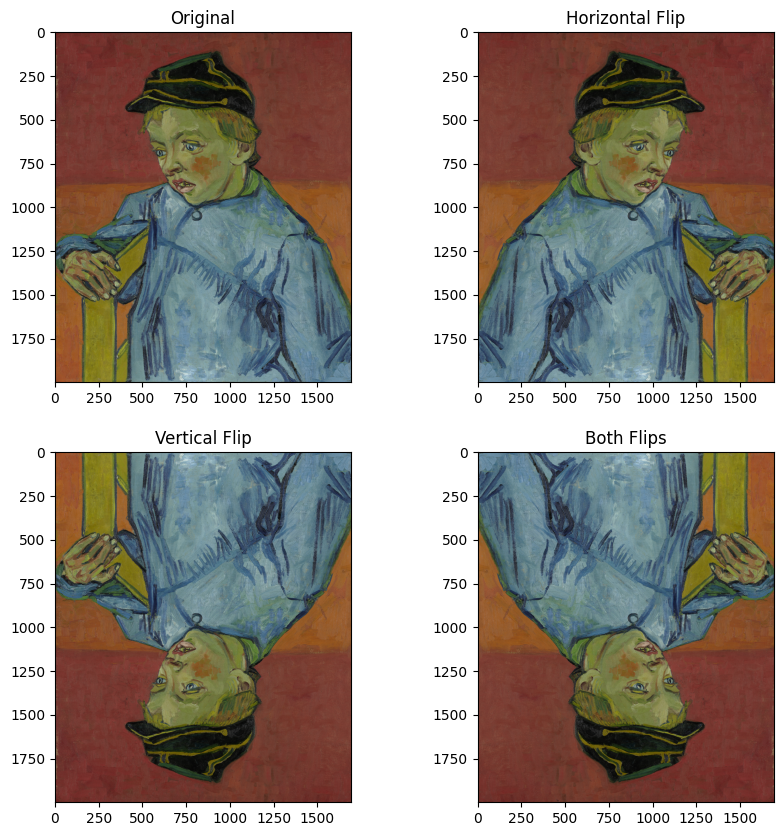

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image using matplotlib (for demonstration purposes)
image = plt.imread('C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg')

# Horizontal flip
horizontal_flip = image[:, ::-1]

# Vertical flip
vertical_flip = image[::-1, :]

# Both horizontal and vertical flip
both_flip = image[::-1, ::-1]

# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(horizontal_flip)
plt.title("Horizontal Flip")

plt.subplot(2, 2, 3)
plt.imshow(vertical_flip)
plt.title("Vertical Flip")

plt.subplot(2, 2, 4)
plt.imshow(both_flip)
plt.title("Both Flips")

plt.show()


Pergunta: perspective warp image in python


To apply a perspective warp to an image using Python, you can use the cv2 library from OpenCV. Here's a step-by-step guide:

Install OpenCV (if you haven't already):

```pip install opencv-python```

Load the image and define the source and destination points.

Use `cv2.getPerspectiveTransform` to get the transformation matrix.

Apply the warp using `cv2.warpPerspective`.

Here's a code example:

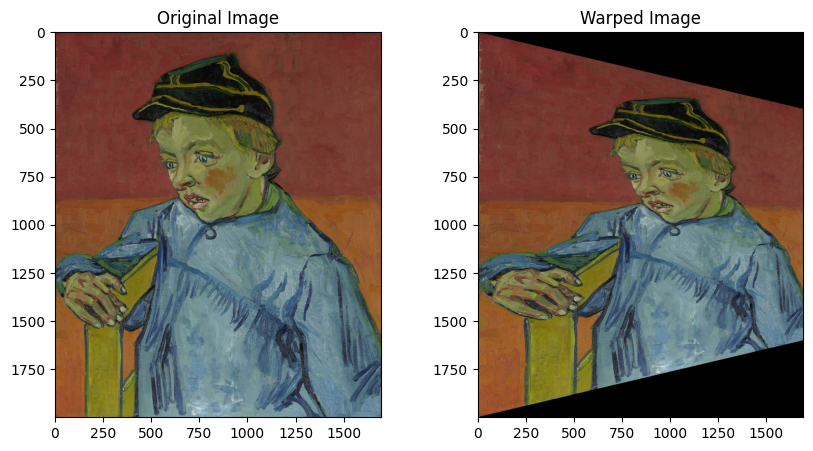

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg')

# Define the points for the transformation
# Source points (the four corners of the part of the image you want to transform)
src_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], 0], 
                         [image.shape[1], image.shape[0]]])

# Destination points (the new coordinates for the corners after transformation)
dst_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], 400], 
                         [image.shape[1], image.shape[0]-400]])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Perform the perspective warp
warped_image = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

# Display the original and warped images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title("Warped Image")

plt.show()
